# Return Maps of Filament Dynamics

In [2]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure4'

import _figure_parameters

linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

## Load the simulation Return Map data

In [54]:

processed_data = '/home/deepak/Dropbox/LacryModeling/processed_data/ReturnMap_BaseTipAngle'

analysis_type = 'ReturnMap_BaseTipAngle'
parameter = 'potDipole strength'

parameter_values_to_plot = [1.526, 1.654, 2.29, 2.744]

In [55]:
# Collate the dataFrames
df_ensemble = pd.DataFrame({})


for root, dirs, files in os.walk(processed_data):
       
    for file in files:
            
        if(analysis_type in file and file.endswith('.csv')):
            
            df = pd.read_csv(os.path.join(root, file))
            
            df_metadata = pd.read_csv(os.path.join(root, 'metadata.csv'))
            
            parameter_value = df_metadata[parameter][0]
            
            if(np.any(abs(parameter_value - parameter_values_to_plot)<=0.1)):

                base_tip_0 = np.array(df['Base-Tip angle'])[:-1]
                base_tip_1 = np.array(df['Base-Tip angle'][1:])



                df_ensemble = df_ensemble.append(pd.DataFrame({'Base-Tip angle (n)':base_tip_0, 
                                                           'Base-Tip angle (n+1)':base_tip_1, 
                                                           parameter:np.repeat(parameter_value, len(base_tip_0))}))
            
        

In [56]:
parameter_values = np.unique(df_ensemble[parameter])

print(parameter_values)

[1.52564103 1.65384615 2.29487179 2.74358974]


## Load Single-cycle Return map Data

In [57]:
# Load the single-cycle prediction data
analysis_type = 'buckling_escape_angles'
single_cycle_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_FINAL'

df_ensemble_predicted = pd.DataFrame({})

for root, dirs, files in os.walk(single_cycle_folder):
    
    for file in files:
        print(file)
        if(analysis_type in file and file.endswith('.csv')):
            
            df = pd.read_csv(os.path.join(root, file))
            
            df_ensemble_predicted = df_ensemble_predicted.append(df)
            
            
            
            
            
            

            

        


buckling_escape_angles_750_1.077.csv
buckling_escape_angles_750_1.141.csv
buckling_escape_angles_750_0.821.csv
buckling_escape_angles_750_2.423.csv
buckling_escape_angles_750_1.397.csv
buckling_escape_angles_750_2.167.csv
buckling_escape_angles_750_1.718.csv
buckling_escape_angles_750_0.628.csv
buckling_escape_angles_750_1.269.csv
buckling_escape_angles_750_1.654.csv
buckling_escape_angles_750_3.0.csv
buckling_escape_angles_750_0.756.csv
buckling_escape_angles_750_1.59.csv
buckling_escape_angles_750_1.974.csv
buckling_escape_angles_750_1.333.csv
buckling_escape_angles_750_0.885.csv
buckling_escape_angles_750_2.808.csv
buckling_escape_angles_750_2.487.csv
buckling_escape_angles_750_2.679.csv
buckling_escape_angles_750_0.692.csv
buckling_escape_angles_750_0.5.csv
buckling_escape_angles_750_1.846.csv
buckling_escape_angles_750_1.91.csv
buckling_escape_angles_750_2.872.csv
buckling_escape_angles_750_1.526.csv
buckling_escape_angles_750_2.744.csv
buckling_escape_angles_750_2.936.csv
bucklin

In [58]:
df_ensemble_predicted

,Unnamed: 0,Initial angle (rad),Final angle (rad),potDipole strength,activity timescale
0,0,1.550109e-14,2.907906e-13,1.077,750
1,1,3.205707e-02,-4.446008e-02,1.077,750
2,2,6.411414e-02,-1.007033e-01,1.077,750
3,3,9.617120e-02,-1.302227e-01,1.077,750
4,4,1.282283e-01,-1.464475e-01,1.077,750
...,...,...,...,...,...
45,45,1.442568e+00,1.784254e+00,2.231,750
46,46,1.474625e+00,1.842511e+00,2.231,750
47,47,1.506682e+00,1.900707e+00,2.231,750
48,48,1.538739e+00,1.958848e+00,2.231,750


[1.52564103 1.65384615 2.29487179 2.74358974]
1.5256410256410255


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


<IPython.core.display.Javascript object>


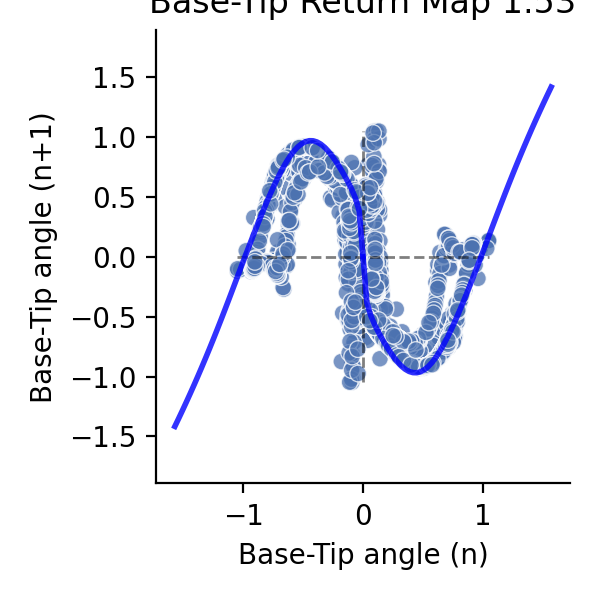

1.6538461538461535


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


<IPython.core.display.Javascript object>


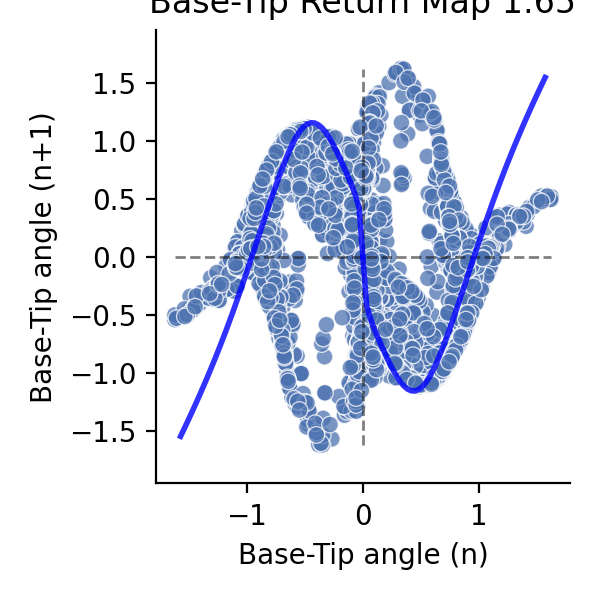

2.2948717948717947


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


<IPython.core.display.Javascript object>


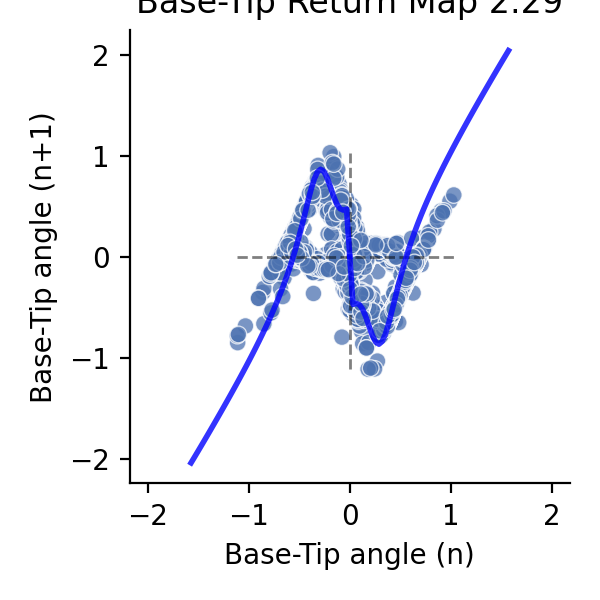

2.743589743589744


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


<IPython.core.display.Javascript object>


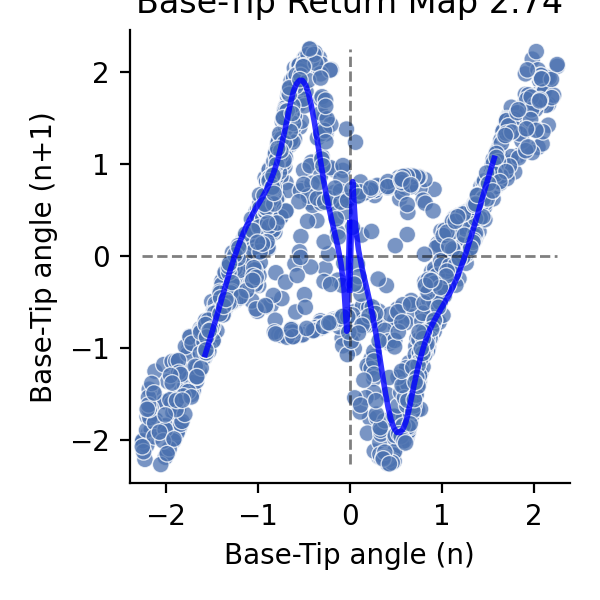

In [102]:
# Plot each activity strength separately
save = True
df_ss_prediction = pd.DataFrame({})
parameter_array = np.unique(df_ensemble[parameter])

print(parameter_array)

for parameter_value in parameter_array:
    
    print(parameter_value)
    df_full_sim = df_ensemble.loc[df_ensemble[parameter]==parameter_value]
    
    df_ss_prediction = df_ensemble_predicted.loc[np.round(df_ensemble_predicted[parameter],3)==np.round(parameter_value,3)]
    
    df_ss_prediction['-Initial angle (rad)'] = -df_ss_prediction['Initial angle (rad)']
    df_ss_prediction['-Final angle (rad)'] = -df_ss_prediction['Final angle (rad)']
    
    title = 'Base-Tip Return Map {}'.format(np.round(parameter_value,2))
    plt.figure(figsize=(3,3))
    
    # Plot the full-sim data
    sns.scatterplot(data = df_full_sim,x = 'Base-Tip angle (n)', y = 'Base-Tip angle (n+1)', hue = parameter, 
                    style = parameter, palette = 'deep', alpha = 0.75, legend = False)
    
    # Plot the single-cycle data
    plt.plot(df_ss_prediction['Initial angle (rad)'], df_ss_prediction['Final angle (rad)'],  color = 'b', alpha = 0.8, linewidth = 2)
    plt.plot(df_ss_prediction['-Initial angle (rad)'], df_ss_prediction['-Final angle (rad)'],  color = 'b', alpha = 0.8, linewidth = 2)

    
    angle_min = np.min(df_full_sim['Base-Tip angle (n)'])
    angle_max = np.max(df_full_sim['Base-Tip angle (n)'])

    diag_line_x = np.linspace(angle_min, angle_max, 20)
    diag_line_y = diag_line_x
    diag_line_y_neg = -diag_line_x

#     ax2 = plt.plot(diag_line_x, diag_line_y, 'k-', linewidth = 1, alpha =0.5)
#     ax2 = plt.plot(diag_line_x, diag_line_y_neg, 'k-', linewidth = 1, alpha =0.5)

    ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--',linewidth = 1, alpha =0.5)
    ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--', linewidth = 1, alpha =0.5)
    
#     plt.xlim([angle_min, angle_max])
    plt.axis('equal')
    plt.tight_layout()
    plt.title(title)
    sns.despine(top=True, right = True)
    
    if(save):

        plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
        plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    plt.show()

## Plot the single-cycle predictions Return maps and Fixed points for particular activity strengths.

### Load the Fixed points data

In [93]:
analysis_type = 'FixedPoints'
folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_FINAL/FixedPointAnalysis'

df_fixed_pts = pd.DataFrame({})

for root, dirs, files in os.walk(folder):
    
    for file in files:
        if(analysis_type in file and file.endswith('.csv')):
            
            df = pd.read_csv(os.path.join(root, file))
            
            df_fixed_pts = df_fixed_pts.append(df)

In [85]:
df_fixed_pts

,Unnamed: 0,Fixed point,Slope,type,potDipole strength,dynamics,stability
0,0,0.000000,660.978106,Positive,2.808,Zero fixed point,unstable
1,0,0.062995,-10.401848,Positive,2.808,1-Period,unstable
2,0,0.856013,3.219984,Negative,2.808,2-Period,unstable
3,0,0.089387,-5.486389,Negative,2.808,2-Period,unstable
0,0,0.000000,-603.159543,Positive,3.000,Zero fixed point,unstable
...,...,...,...,...,...,...,...
0,0,0.000000,1737.676528,Positive,2.423,Zero fixed point,unstable
1,0,0.199668,-2.394827,Positive,2.423,1-Period,unstable
2,0,0.768982,2.063736,Positive,2.423,1-Period,unstable
0,0,0.000000,-2.596859,Positive,1.141,Zero fixed point,unstable


<IPython.core.display.Javascript object>


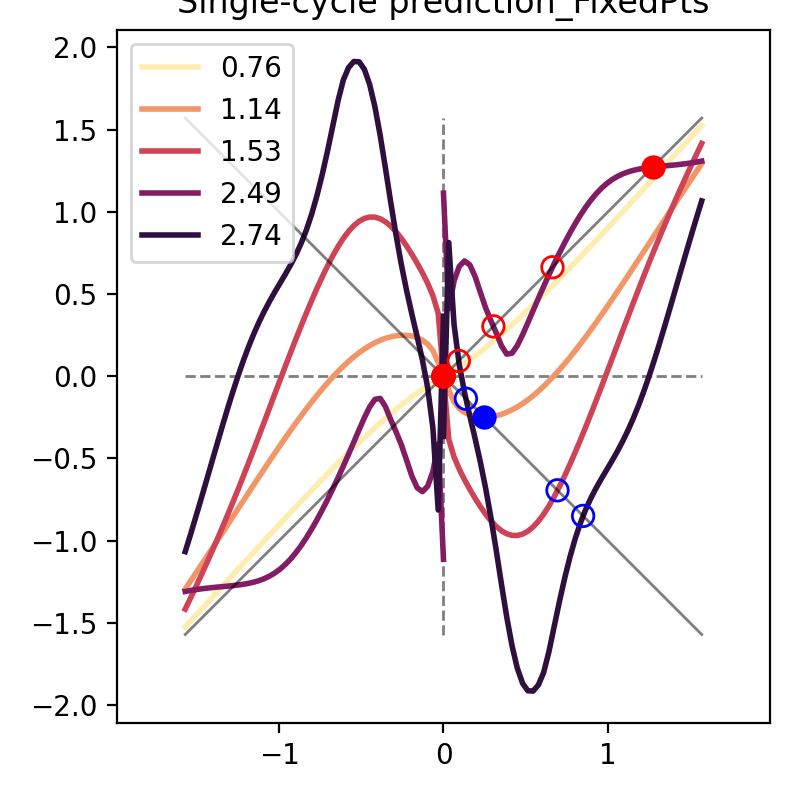

0.756
1.141
1.526
2.487
2.744


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [95]:
parameter_values_to_plot = [0.756, 1.141, 1.526, 2.487, 2.744]
save = True

cmap = plt.cm.get_cmap(ACTIVITY_STRENGTH_CMAP, 255)
colors = [cmap(ii) for ii in np.linspace(0,1,len(parameter_values_to_plot))]

title = 'Single-cycle prediction_FixedPts'
plt.figure(figsize=(4,4))

for ii, parameter_value in enumerate(parameter_values_to_plot):
    
    print(parameter_value)
    
    df_ss_prediction = df_ensemble_predicted.loc[np.round(df_ensemble_predicted[parameter],3)==np.round(parameter_value,3)]
    
    df_ss_prediction['-Initial angle (rad)'] = -df_ss_prediction['Initial angle (rad)']
    df_ss_prediction['-Final angle (rad)'] = -df_ss_prediction['Final angle (rad)']
    
    # Plot the single-cycle data
    plt.plot(df_ss_prediction['Initial angle (rad)'], df_ss_prediction['Final angle (rad)'],  
             color = colors[ii], alpha = 1, linewidth = 2, label = np.round(parameter_value,2))
    plt.plot(df_ss_prediction['-Initial angle (rad)'], df_ss_prediction['-Final angle (rad)'],  
             color =  colors[ii], alpha = 1, linewidth = 2)

    
    
    # Plot the fixed points
    df_fixed_pts_parameter = df_fixed_pts.loc[np.round(df_fixed_pts[parameter],3)==np.round(parameter_value,3)]
    
    for jj in range(len(df_fixed_pts_parameter)):
        
        fixed_pt = df_fixed_pts_parameter['Fixed point'][jj]
        stability = df_fixed_pts_parameter['stability'][jj]
        fixed_pt_type = df_fixed_pts_parameter['type'][jj]
        
        if(fixed_pt_type=='Positive'):
            y_fixed_pt = fixed_pt
            if(stability == 'linearly stable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o',facecolors='r', edgecolors='r', zorder = 10)
            elif(stability == 'unstable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o', facecolors='none', edgecolors='r', zorder = 10)
        else:
            y_fixed_pt = -fixed_pt
            if(stability == 'linearly stable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o',facecolors='b', edgecolors='b', zorder = 10)
            elif(stability == 'unstable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o', facecolors='none', edgecolors='b', zorder = 10)
                
    angle_max = np.max(df_ss_prediction['Initial angle (rad)'])

diag_line_x = np.linspace(-angle_max, angle_max, 20)
diag_line_y = diag_line_x
diag_line_y_neg = -diag_line_x

ax2 = plt.plot(diag_line_x, diag_line_y, 'k-', linewidth = 1, alpha =0.5)
ax2 = plt.plot(diag_line_x, diag_line_y_neg, 'k-', linewidth = 1, alpha =0.5)

ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--',linewidth = 1, alpha =0.5, )
ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--', linewidth = 1, alpha =0.5)

plt.axis('equal')
plt.tight_layout()
plt.title(title)
plt.legend()
if(save):

    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

## Plots near high activity values

<IPython.core.display.Javascript object>


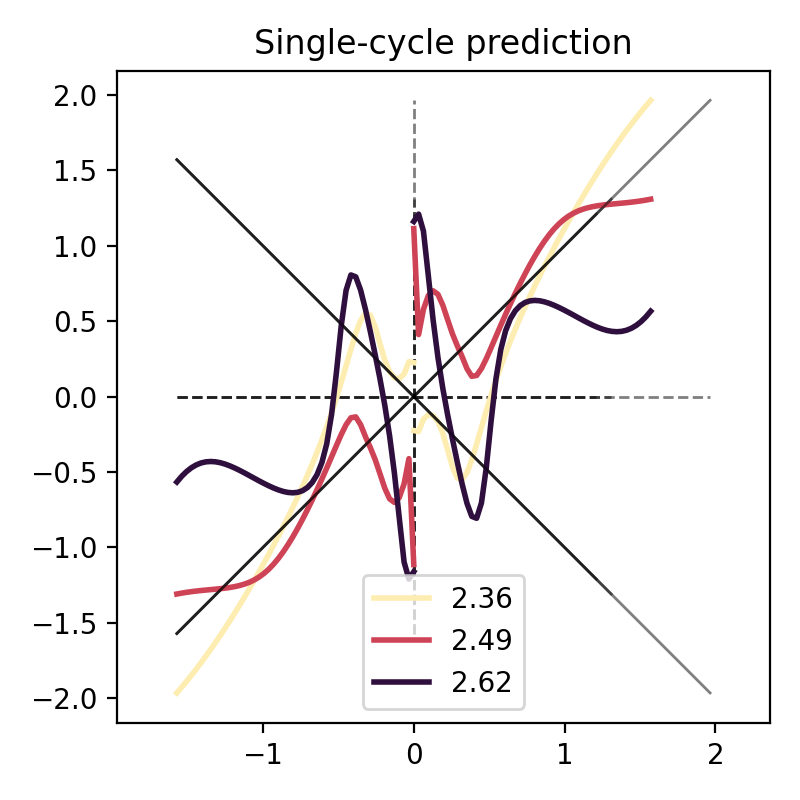

2.359
2.487
2.615


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [76]:
parameter_values_to_plot = [2.359, 2.487, 2.615]

cmap = plt.cm.get_cmap(ACTIVITY_STRENGTH_CMAP, 255)
colors = [cmap(ii) for ii in np.linspace(0,1,len(parameter_values_to_plot))]

title = 'Single-cycle prediction'
plt.figure(figsize=(4,4))

for ii, parameter_value in enumerate(parameter_values_to_plot):
    
    print(parameter_value)
    
    df_ss_prediction = df_ensemble_predicted.loc[np.round(df_ensemble_predicted[parameter],3)==np.round(parameter_value,3)]
    
    df_ss_prediction['-Initial angle (rad)'] = -df_ss_prediction['Initial angle (rad)']
    df_ss_prediction['-Final angle (rad)'] = -df_ss_prediction['Final angle (rad)']
    
    # Plot the single-cycle data
    plt.plot(df_ss_prediction['Initial angle (rad)'], df_ss_prediction['Final angle (rad)'],  color = colors[ii], alpha = 1, linewidth = 2, label = np.round(parameter_value,2))
    plt.plot(df_ss_prediction['-Initial angle (rad)'], df_ss_prediction['-Final angle (rad)'],  color =  colors[ii], alpha = 1, linewidth = 2)

    
    angle_min = np.min(df_ss_prediction['-Initial angle (rad)'])
    angle_max = np.max(df_ss_prediction['Final angle (rad)'])

    diag_line_x = np.linspace(angle_min, angle_max, 20)
    diag_line_y = diag_line_x
    diag_line_y_neg = -diag_line_x

    ax2 = plt.plot(diag_line_x, diag_line_y, 'k-', linewidth = 1, alpha =0.5)
    ax2 = plt.plot(diag_line_x, diag_line_y_neg, 'k-', linewidth = 1, alpha =0.5)

    ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--',linewidth = 1, alpha =0.5)
    ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--', linewidth = 1, alpha =0.5)
    
    plt.axis('equal')
    plt.tight_layout()
    plt.title(title)
    plt.legend()